In [1]:
"""Итераторы и генераторы."""

'Итераторы и генераторы.'

## Итераторы и генераторы.
- Введем понятия итерируемого объекта и итератора, а также рассмотрим функции-генераторы и продолжим знакомство с модулем itertools.
## Итерируемый объект и итератор
### Основные определения.
- Многие структуры данных в Питоне являются итерируемыми объектами (iterable objects), то есть такими объектами, к которым можно получать доступ (их можно перебирать) внутри цикла. К ним, в частности, относятся списки, кортежи, словари и строки. Приведем пример.

In [2]:
from itertools import chain, count, cycle

for i in [1, 2, 3]:
    print(i)

1
2
3


- Технически, каждый итерируемый объект должен содержать метод .__iter__(), который создает объект, называемый итератором.

In [21]:
# встроенная функция iter() вызывает метод .__iter__(),
# создающий итератор
iter_list_1 = iter([1, 2, 3])
print(iter_list_1)

- Итератор (iterator) позволяет извлекать элементы итерируемого объекта один за другим отслеживая, какой именно элемент был извлечен на данной итерации. Класс итератора, таким образом, должен включать два метода:
    - метод .__iter__(), который возвращает сам этот объект; и
    - метод .__next__(), возвращающий следующий элемент последовательности.
- Наличие обязательных методов .__iter__() и .__next__() следует так называемому протоколу итератора (iterator protocol).
- Продемонстрируем функционал итератора с помощью функций iter() и next(), вызывающих соответствующие методы.

In [22]:
iterable_object: list[int] = [1, 2, 3]

iterator_l = iter(iterable_object)
print(iterator_l)
print()

print(next(iterator_l))
print(next(iterator_l))
print(next(iterator_l))


1
2
3


- При использовании цикла итератор создается автоматически.

In [23]:
for iterator_el in iterable_object:
    print(iterator_el)

1
2
3


- Такое разделение итерируемого объекта и итератора позволяет оставлять нетронутыми данные в итерируемом объекте и обращаться к ним столько раз, сколько это необходимо с помощью итератора.
- В качестве иллюстрации создадим два различных итератора и убедимся, что после применения обоих итерируемый объект не претерпел изменений.

In [24]:
iterable_object_2: list[int] = [1, 2, 3]

iterator_a = iter(iterable_object_2)
iterator_b = iter(iterable_object_2)

print(f"A: {next(iterator_a)}")
print(f"A: {next(iterator_a)}")
print(f"A: {next(iterator_a)}")
print(f"B: {next(iterator_b)}")

A: 1
A: 2
A: 3
B: 1


In [25]:
print(iterable_object_2)

[1, 2, 3]


- 
    - Пример выше иллюстрирует концепцию ленивых вычислений (lazy evaluation), при которых очередное вычисление выполняется только, когда это необходимо (например, при вызове функции next()).
- Если же применить метод .__next__() после извлечения последнего элемента данного объекта, то сработает исключение StopIteration.

In [26]:
# print(f'A: {next(iterator_a)}')

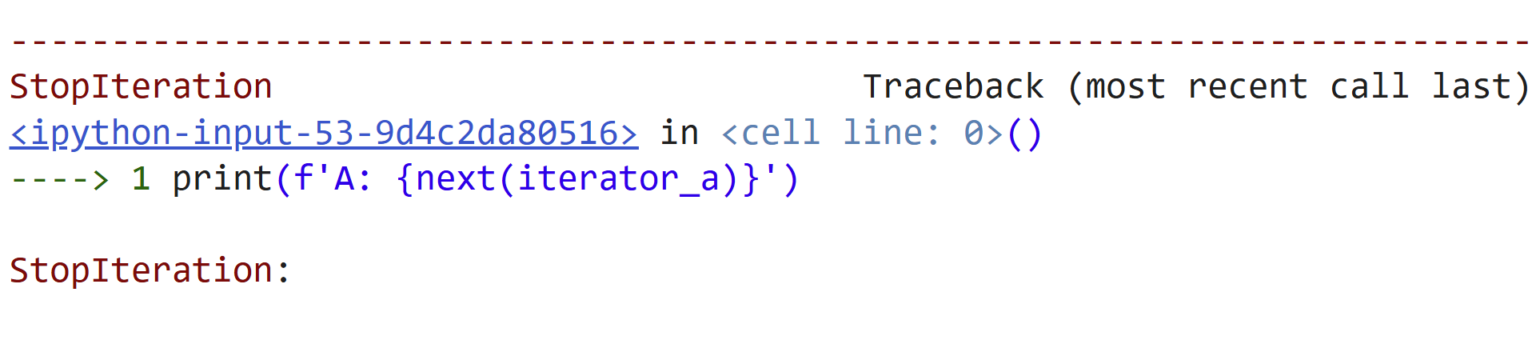

- Функция list() позволяет обойти и вернуть все (оставшиеся) элементы конкретного итератора.

In [27]:
iter_a_list: list[int] = list(iterator_a)
iter_b_list: list[int] = list(iterator_b)
print(iter_a_list, iter_b_list)

[] [2, 3]


- Такая практика возвращения (а значит и хранения в памяти) всех элементов итератора не всегда является оптимальной.
- Добавим, что именно концепция разделения итерируемого объекта и итератора делает возможным извлечение объектов из неупорядоченных коллекций, например, множеств.

In [31]:
for iterset_1 in {1, 1, 2, 3}:  # pylint: disable=C0208,W0130
    print(iterset_1)

1
2
3


## Отсутствие «обратного хода»


In [32]:
iterator_c = iter(iterable_object)

for i_1 in iterator_c:
    print(i_1)
    break

for j_1 in iterator_c:
    print(j_1)

1
2
3


## Функция zip()
- Помимо функции iter() еще одной функцией, возвращающей итератор из итерируемого объекта, является функция zip().

In [33]:
zip(iterable_object, iterable_object)

- Если говорить более точно, функция zip() объединяет несколько итерируемых объектов и создает итератор кортежей (iterator of tuples) или объект zip. Метод .__next__() объекта zip выдает первые, вторые и т.д. элементы соответствующих объектов.

In [34]:
iterator_tuple = zip(iterable_object, iterable_object)

print(next(iterator_tuple))
print(next(iterator_tuple))
print(next(iterator_tuple))

(1, 1)
(2, 2)
(3, 3)


- На практике конечно удобнее передать итерируемые объекты в функцию zip() и создавать и вызывать метод .__next__() итератора в цикле.

In [36]:
for i in zip(iterable_object, iterable_object):  # type: ignore
    print(i)

(1, 1)
(2, 2)
(3, 3)


## Примеры итераторов.
- Приведем пример создания класса итератора с нуля. В частности, пусть первый итератор принимает на вход некоторую последовательность чисел и возвращает квадрат каждого из них.

In [37]:
class Square:
    """возвращает квадрат."""

    def __init__(self, seq: list[int] | tuple[int, ...]) -> None:
        """Инициализирует итератор последовательностью."""
        self._seq = seq
        self._idx = 0

    def __iter__(self):  # type: ignore[no-untyped-def]
        """Возвращает self в качестве итератора."""
        return self

    def __next__(self) -> int:
        """Возвращает значение в квадрате или StopIteration."""
        if self._idx >= len(self._seq):
            raise StopIteration
        square_result: int = self._seq[self._idx] ** 2
        self._idx += 1
        return square_result

In [38]:
square_iterator: Square = Square([1, 2, 3, 4, 5])
print(square_iterator)

In [39]:
for square_value in square_iterator:
    print(square_value)

1
4
9
16
25


- Итераторы также могут самостоятельно создавать новые данные.

In [4]:
class Counter:
    """Простой итератор, отсчитывающий время от начала до конца."""

    def __init__(self, start: int = 3, stop: int = 9) -> None:
        """Инициализация с указанием границ.."""
        self._current = start - 1
        self._stop = stop

    def __iter__(self):  # type: ignore[no-untyped-def]
        """Возвращает self в качестве итератора."""
        return self

    def __next__(self) -> int:
        """Возвращает следующее число или вызывает исключение."""
        self._current += 1
        if self._current >= self._stop:
            raise StopIteration
        return self._current

In [5]:
counter_instance: Counter = Counter()
print(counter_instance)

In [6]:
print(next(counter_instance))
print(next(counter_instance))

3
4


In [7]:
for count_value in counter_instance:
    print(count_value)

5
6
7
8


- Класс Iterator модуля collections.abc автоматически создает метод .__iter__(). Метод .__next__() нужно прописать руками, чтобы он мог решить поставленную выше задачу возвращения следующего значения последовательности.

In [10]:
class Counter2:
    """Итератор, явно реализующий протокол итераторов."""

    def __init__(self, start: int = 3, stop: int = 9) -> None:
        """Инициализация с указанием границ."""
        self._current = start - 1
        self._stop = stop

    def __iter__(self):  # type: ignore[no-untyped-def]
        """Возвращает self в качестве итератора."""
        return self

    def __next__(self) -> int:
        """Возвращает следующее число или вызывает исключение."""
        self._current += 1
        if self._current >= self._stop:
            raise StopIteration
        return self._current

In [11]:
for count_value in Counter2():
    print(count_value)

3
4
5
6
7
8


- Итераторы способны выдавать бесконечный поток данных. Рассмотрим итератор, создающий последовательность Фибоначчи.

In [14]:
class FibIterator:
    """Итератор, генерирующий числа Фибоначчи."""

    def __init__(self) -> None:
        """Инициализируйте начальные значения."""
        self._idx = 0
        self._current = 0
        self._next = 1

    def __iter__(self):  # type: ignore[no-untyped-def]
        """Возвращает self в качестве итератора."""
        return self

    def __next__(self) -> int:
        """Возвращает следующее число Фибоначчи."""
        if self._idx < 0:
            raise StopIteration
        self._idx += 1
        self._current, self._next = (self._next, self._current + self._next)
        return self._current

In [15]:
fib_limit: int = 10

for fib_value in FibIterator():
    print(fib_value)
    fib_limit -= 1
    if fib_limit == 0:
        break

1
1
2
3
5
8
13
21
34
55


- Если не задать условие остановки (breaking condition), цикл выше будет выполняться бесконечно.
- Помимо использования существующего или написания собственного итератора для получения значений по одному за раз бывает удобно использовать генератор.

## Генераторы.

- Генератором (generator) или функцией-генератором (generator function) называется функция, которая не возвращает (returns) некоторый результат и прекращает выполнение кода, но создает (yields) объект-генератор (generator object), к элементам которого можно также обращаться последовательно.

### Простой пример.
- Рассмотрим функцию, которая создает последовательность чисел.

In [17]:
def sequence(count_limit: int) -> list[int]:
    """Возвращает список целых чисел от 1 до n включительно."""
    res: list[int] = [x for x in range(1, count_limit + 1)]
    return res


sequence(5)

[1, 2, 3, 4, 5]

- Если использовать ключевое слово yield вместо return, то функция вернет не последовательность, а объект-генератор.

In [18]:
def sequence_gen(count_limit: int):  # type: ignore[no-untyped-def]
    """Yield integers from 1 to n inclusive."""
    yield from range(1, count_limit + 1)


sequence_gen(5)

<generator object sequence_gen at 0x000002866CBC8860>

- К этому объекту можно применить метод .__next__() и выводить одно значение последовательности за раз.

In [19]:
seq_5 = sequence_gen(5)

print(next(seq_5))
print(next(seq_5))

1
2


- 
    - Технически, метод .__next__() выполняет код в теле функции до тех пор, пока не встретит yield, возвращает текущее значение переменной x и запоминает место этого элемента в последовательности.
- Все элементы последовательности можно вывести с помощью цикла.

In [20]:
for number in seq_5:
    print(number)

3
4
5


- Если вызвать метод .__next__() после того, как генератор выдаст все имеющиеся значения, сработает исключение StopIteration.

In [21]:
# next(seq_5)

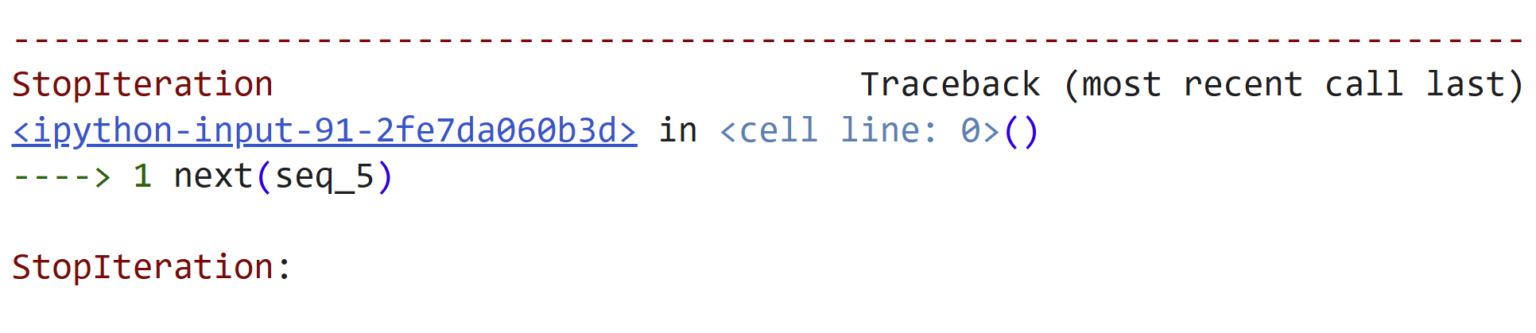

## Generator comprehension.
- Создать объект-генератор можно в одну строчку аналогично list comprehension, но с использованием круглых скобок.



In [22]:
gen_expr = (x for x in range(1, 5 + 1))
print(gen_expr)

<generator object <genexpr> at 0x000002866C849600>


- После этого объект можно превратить в список

In [23]:
gen_expr_list: list[int] = list(x for x in range(1, 5 + 1))
print(gen_expr_list)

[1, 2, 3, 4, 5]


- или, например, найти сумму элементов

In [24]:
sum_gen: int = sum(x for x in range(1, 5 + 1))
print(sum_gen)

15


In [25]:
contains_value: bool = 5 in (x for x in range(1, 5 + 1))
print(contains_value)

True


## Модуль itertools.
- ранее мы уже рассмотрели функции модуля itertools, связанные с комбинаторными вычислениями. Познакомимся с некоторыми другими возможностями этой библиотеки.
### Функция count()
- Функция count() создает итератор, возвращающий бесконечную последовательность равноудаленных чисел типа int или float.

In [26]:
# from itertools import count
natural_numbers = count(start=1, step=0.5)

for num in natural_numbers:
    print(num)
    if num == 2:
        break

1
1.5
2.0


- На практике функцию count() можно использовать, например, для индексирования элементов списка.

In [27]:
list_let: list[str] = ["a", "b", "c", "d"]
for enumerated_letter in zip(count(start=1), list_let):
    print(enumerated_letter)

(1, 'a')
(2, 'b')
(3, 'c')
(4, 'd')


- Кроме этого, совместив count() с map() можно получить значения некоторой функции.

In [29]:
def quadratic(value: int | float) -> float:
    """Возвращает результат квадратичного выражения."""
    return value**2 + value - 2


f_x = map(quadratic, count())
print(next(f_x), next(f_x), next(f_x))

-2 0 4


In [30]:
for mapped_value in f_x:
    print(mapped_value)
    if mapped_value > 10:
        break

10
18


- Обратим внимание, что функция count() требует условия остановки, чтобы избежать бесконечного выполнения.
### Функция cycle()
- Функция cycle() принимает в качестве аргумента итерируемый объект и создает итератор, содержащий все его элементы. Кроме этого, создается копия этих элементов.
- После перебора всех элементов итератора начинается перебор скопированных элементов и одновременно создается новая копия. Затем цикл перебора и копирования продолжается до бесконечности.

In [31]:
cycle_numbers: list[int] = [1, 2, 3]
cycle_iterator_numbers = cycle(cycle_numbers)

cycle_nums_limit: int = 5
for number in cycle_iterator_numbers:
    print(number)
    cycle_nums_limit -= 1
    if cycle_nums_limit == 0:
        break

1
2
3
1
2


- Строки, как мы помним, также являются итерируемым объектом.

In [32]:
string_value: str = "Python"
cycle_iterator_chars = cycle(string_value)

cycle_chars_limit: int = 10
for char in cycle_iterator_chars:
    print(char)
    cycle_chars_limit -= 1
    if cycle_chars_limit == 0:
        break

P
y
t
h
o
n
P
y
t
h


### Функция chain()
- Функция chain() объединяет (сцепляет) несколько итерируемых объектов в один итератор.

In [33]:
chain_iterator = chain(["abc", "d", "e", "f"], "abc", [1, 2, 3])
print(chain_iterator)

- Обратите внимание, когда строка 'abc' является элементом итерируемого объекта, она далее не разделяется на отдельные символы. Если же строка сама является итерируемым объектом, то функция chain() разделяет ее на буквы.
- Разделить итерируемые объекты, вложенные в другой итерируемый объект, можно с помощью функции chain.from_iterable().

In [35]:
flatten_letters: list[str] = list(chain.from_iterable(["abc", "def"]))
print(flatten_letters)

['a', 'b', 'c', 'd', 'e', 'f']


- Эту функцию можно использовать, например, для расчета суммы чисел, содержащихся во вложенных списках.

In [36]:
sum_numbers: int = sum(chain.from_iterable([[1, 2, 3], [4, 5, 6], [7, 8, 9]]))
print(sum_numbers)

45
